Weather forecast for London:
Average Temperature: 8.49°C
Maximum Temperature: 11.32°C
Minimum Temperature: 5.35°C


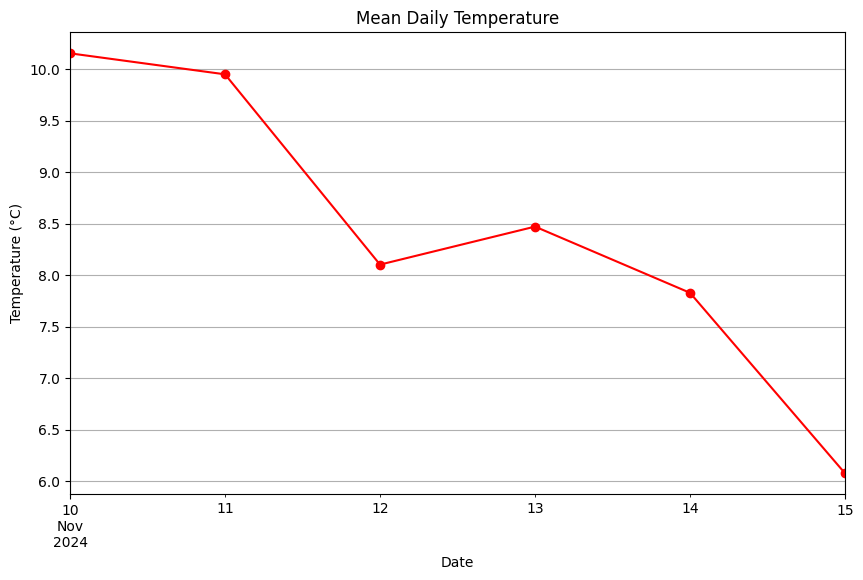

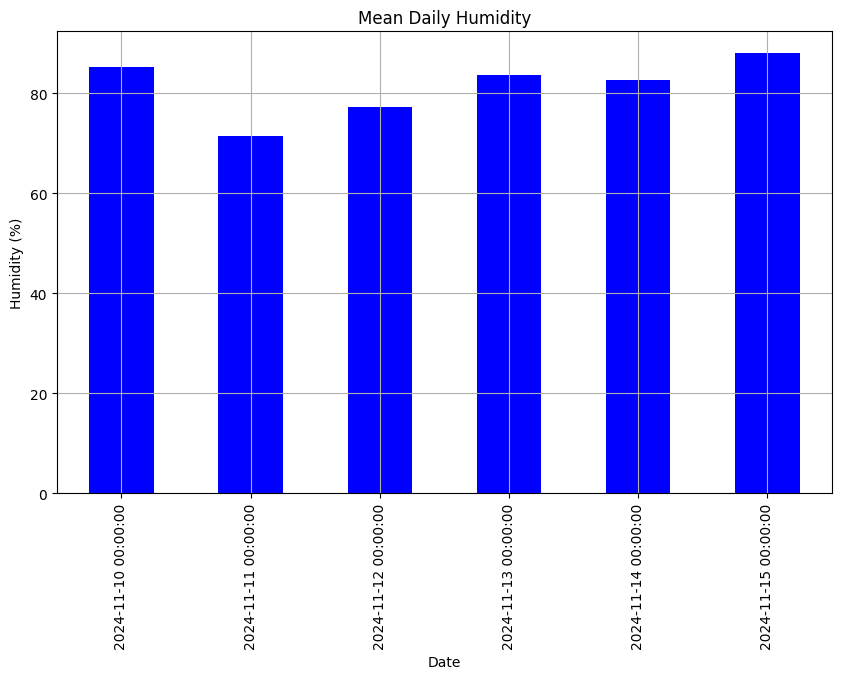

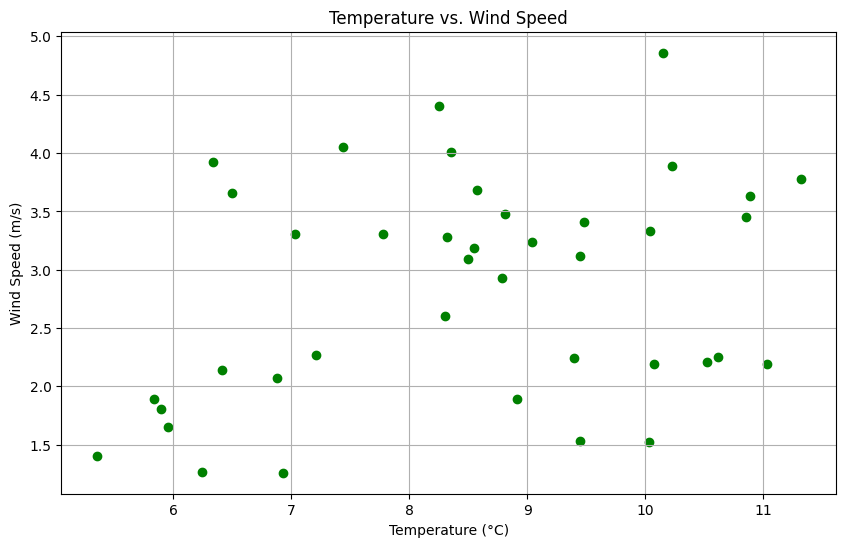

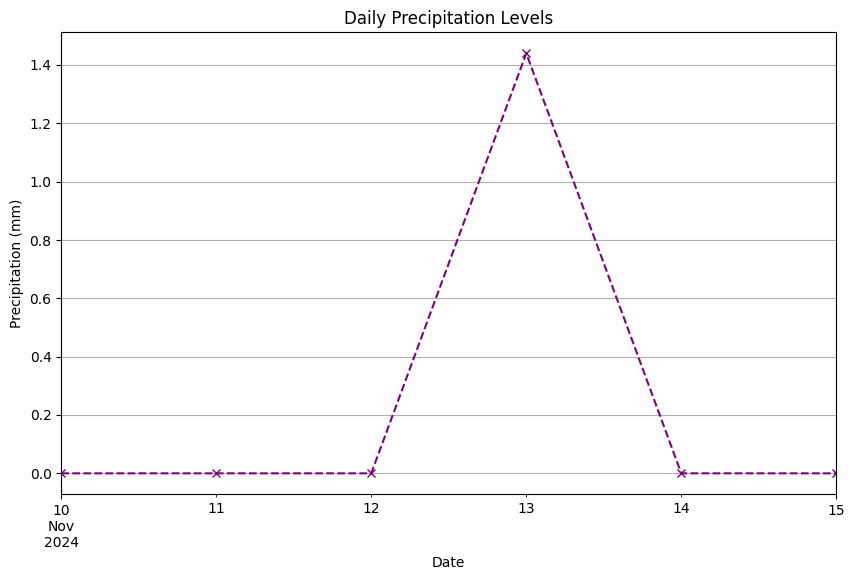

C:\Users\khata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\plotting\_matplotlib\core.py:1409: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


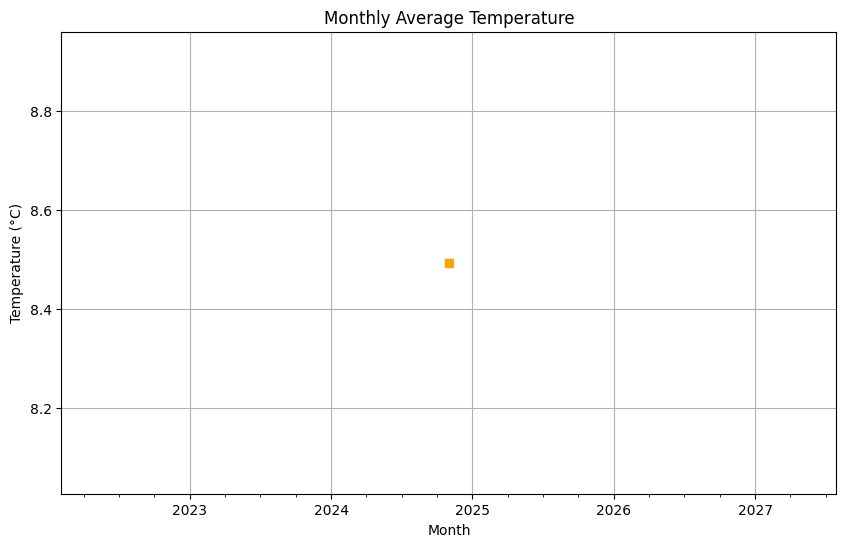

Geospatial map saved as 'weather_map.html'.


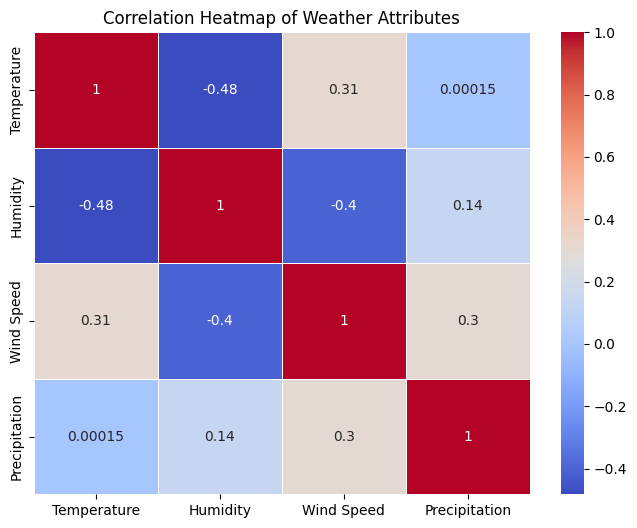

In [9]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Step 1: Register and obtain API key from OpenWeatherMap
api_key = "b84d8dd46624c53a78044de5f537ace5"

# Step 2: Interact with the OpenWeatherMap API
city_name = "London"
base_url = "https://api.openweathermap.org/data/2.5/forecast"

params = {
    "q": city_name,
    "appid": api_key,
    "units": "metric"
}

response = requests.get(base_url, params=params)
data = response.json()

# Check if the response is successful
if response.status_code != 200:
    print(f"Error: {data['message']}")
    exit()

print(f"Weather forecast for {city_name}:")

# Step 3: Extract relevant weather attributes
weather_data = data["list"]

timestamps = [entry["dt"] for entry in weather_data]
temperatures = [entry["main"]["temp"] for entry in weather_data]
humidity = [entry["main"]["humidity"] for entry in weather_data]
wind_speed = [entry["wind"]["speed"] for entry in weather_data]
descriptions = [entry["weather"][0]["description"] for entry in weather_data]

# Extract precipitation data (rain and snow)
precipitation = []
for entry in weather_data:
    rain = entry.get("rain", {}).get("3h", 0)
    snow = entry.get("snow", {}).get("3h", 0)
    total_precip = rain + snow
    precipitation.append(total_precip)

# Step 4: Clean and preprocess the data
datetime_objects = [pd.to_datetime(timestamp, unit="s") for timestamp in timestamps]

# Create DataFrame
weather_df = pd.DataFrame({
    "Datetime": datetime_objects,
    "Temperature": temperatures,
    "Humidity": humidity,
    "Wind Speed": wind_speed,
    "Precipitation": precipitation,
    "Description": descriptions
})

# Set datetime as index
weather_df.set_index("Datetime", inplace=True)

# Step 5: Data Modeling
avg_temp = weather_df["Temperature"].mean()
max_temp = weather_df["Temperature"].max()
min_temp = weather_df["Temperature"].min()

print(f"Average Temperature: {avg_temp:.2f}°C")
print(f"Maximum Temperature: {max_temp:.2f}°C")
print(f"Minimum Temperature: {min_temp:.2f}°C")

# Step 6: Data Visualization

# Line plot for mean daily temperature
daily_mean_temp = weather_df["Temperature"].resample("D").mean()
plt.figure(figsize=(10, 6))
daily_mean_temp.plot(color="red", linestyle="-", marker="o")
plt.title("Mean Daily Temperature")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()

# Bar plot for mean daily humidity
daily_mean_humidity = weather_df["Humidity"].resample("D").mean()
plt.figure(figsize=(10, 6))
daily_mean_humidity.plot(kind="bar", color="blue")
plt.title("Mean Daily Humidity")
plt.xlabel("Date")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.show()

# Scatter plot for temperature vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(weather_df["Temperature"], weather_df["Wind Speed"], color="green")
plt.title("Temperature vs. Wind Speed")
plt.xlabel("Temperature (°C)")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.show()

# Line plot for precipitation over time
daily_precipitation = weather_df["Precipitation"].resample("D").sum()
plt.figure(figsize=(10, 6))
daily_precipitation.plot(color="purple", linestyle="--", marker="x")
plt.title("Daily Precipitation Levels")
plt.xlabel("Date")
plt.ylabel("Precipitation (mm)")
plt.grid(True)
plt.show()

# Step 7: Data Aggregation (Monthly)
monthly_avg_temp = weather_df["Temperature"].resample("M").mean()
monthly_avg_humidity = weather_df["Humidity"].resample("M").mean()

# Line plot for monthly average temperature
plt.figure(figsize=(10, 6))
monthly_avg_temp.plot(color="orange", linestyle="-", marker="s")
plt.title("Monthly Average Temperature")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()

# Step 8: Geospatial Visualization using Folium
latitude = data["city"]["coord"]["lat"]
longitude = data["city"]["coord"]["lon"]

# Create a Folium map
weather_map = folium.Map(location=[latitude, longitude], zoom_start=10)

# Add a marker for the city
folium.Marker([latitude, longitude], popup=f"{city_name} Weather Data").add_to(weather_map)

# Display the Folium map
weather_map.save("weather_map.html")
print("Geospatial map saved as 'weather_map.html'.")

# Step 9: Explore Relationships using Correlation Heatmap

# Drop non-numeric columns before calculating the correlation matrix
numeric_df = weather_df.select_dtypes(include=["float64", "int64"])

# Check if the DataFrame is empty after filtering
if numeric_df.empty:
    print("No numeric data available for correlation heatmap.")
else:
    plt.figure(figsize=(8, 6))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Correlation Heatmap of Weather Attributes")
    plt.show()

